In [193]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## specify the directory you saved the data and images in
DATA_DIR = os.path.join(".","data")
IMAGE_DIR = os.path.join(".","images")

In [194]:
## load the data and print the shape
df = pd.read_csv(os.path.join(DATA_DIR, "avail-data-visualization.csv"))
print("df: {} x {}".format(df.shape[0], df.shape[1]))

## clean up the column names
df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

## check the first few rows
df.head(n=4)

df: 1000 x 7


customer_id   country_name   age     customer_name  is_subscriber  \
0            1  united_states  21.0        Kasen Todd           True   
1            2      singapore  31.0      Ensley Garza          False   
2            3  united_states  22.0     Lillian Carey          False   
3            4  united_states  21.0  Beau Christensen           True   

  subscriber_type  num_streams  
0  aavail_premium         23.0  
1             NaN         12.0  
2  aavail_premium         22.0  
3    aavail_basic         19.0

In [196]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))


Missing Value Summary
-----------------------------------
customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64


In [197]:
## drop the rows that have NaNs
print("Original Matrix:", df.shape)
df.dropna(inplace=True)
print("After NaNs removed:", df.shape)


Original Matrix: (1000, 7)
After NaNs removed: (883, 7)


In [198]:
df.isnull().sum(axis=0)

customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64

In [199]:
df.groupby('country_name')['is_subscriber'].size()

country_name
singapore        258
united_states    625
Name: is_subscriber, dtype: int64

In [200]:
table1 = pd.pivot_table(df, index='country_name', columns='is_subscriber')
table1

age            customer_id             num_streams  \
is_subscriber      False      True        False       True        False   
country_name                                                              
singapore      27.649351  27.221154  511.584416  515.144231   14.870130   
united_states  27.804124  28.070076  471.453608  501.060606   19.639175   

                          
is_subscriber      True   
country_name              
singapore      15.576923  
united_states  18.767045

In [203]:
df['is_subscriber'] = df['is_subscriber'].apply(lambda x: 0 if x == False else 1)

In [204]:
df

customer_id   country_name   age     customer_name  is_subscriber  \
0              1  united_states  21.0        Kasen Todd              1   
2              3  united_states  22.0     Lillian Carey              0   
3              4  united_states  21.0  Beau Christensen              1   
4              5      singapore  22.0    Ernesto Gibson              1   
6              7      singapore  49.0       Daxton Tate              0   
..           ...            ...   ...               ...            ...   
995          996      singapore  55.0   Peyton Enriquez              0   
996          997  united_states  23.0     Amina Manning              1   
997          998  united_states  25.0    Brooks Ventura              1   
998          999  united_states  40.0     Nayeli Mathis              1   
999         1000  united_states  21.0        Cole Solis              1   

      subscriber_type  num_streams  
0      aavail_premium         23.0  
2      aavail_premium         22.0  
3        aavail_basic         19.0  
4      aavail_premium         23.0  
6        aavail_basic         18.0  
..                ...          ...  
995  aavail_unlimited         14.0  
996      aavail_basic         24.0  
997  aavail_unlimited         17.0  
998  aavail_unlimited         16.0  
999  aavail_unlimited         18.0  

[883 rows x 7 columns]

# Preprocessing data

In [205]:
# df
from sklearn.preprocessing import OneHotEncoder
one1 = OneHotEncoder()
column = df['subscriber_type'].values.reshape(-1,1)
one1.fit(column)
labels1 = one1.categories_[0].tolist()
X1 = one1.transform(column).toarray()

# one hot encode the country 
one2 = OneHotEncoder()
column = df['country_name'].values.reshape(-1,1)
one2.fit(column)
labels2 = one2.categories_[0].tolist()
X2 = one2.transform(column).toarray()

# concat all of the data
labels = ['is_subscriber', 'age', 'num_streams']
X = df.loc[:, labels].to_numpy()
labels = labels + labels1 + labels2
X = np.hstack([X, X1, X2])
df1 = pd.DataFrame({label: X[:, i] for i, label in enumerate(labels)})
df1.head()

is_subscriber   age  num_streams  aavail_basic  aavail_premium  \
0            1.0  21.0         23.0           0.0             1.0   
1            0.0  22.0         22.0           0.0             1.0   
2            1.0  21.0         19.0           1.0             0.0   
3            1.0  22.0         23.0           0.0             1.0   
4            0.0  49.0         18.0           1.0             0.0   

   aavail_unlimited  singapore  united_states  
0               0.0        0.0            1.0  
1               0.0        0.0            1.0  
2               0.0        0.0            1.0  
3               0.0        1.0            0.0  
4               0.0        1.0            0.0

In [206]:
print(X.shape)
np.random.seed(0)
num_nulls = 50
null_rows = np.random.choice(X.shape[0], size=num_nulls, replace = False)
null_col = [0]*num_nulls
known_missing = X[null_rows, null_col].copy()
X[null_rows, null_col] = np.nan

print(np.isnan(X).sum(axis=0))

(883, 8)
[50  0  0  0  0  0  0  0]


In [207]:
def make_corr_plot(df, columns):
    '''
    make a pairwise correlation plot
    '''
    
    # Compute the correlation matrix
    corr = df[columns].corr()
    # Generate a mask for upper triangle 
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 7), dpi=150, facecolor='white')
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio 
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [208]:
df1.shape

(883, 8)

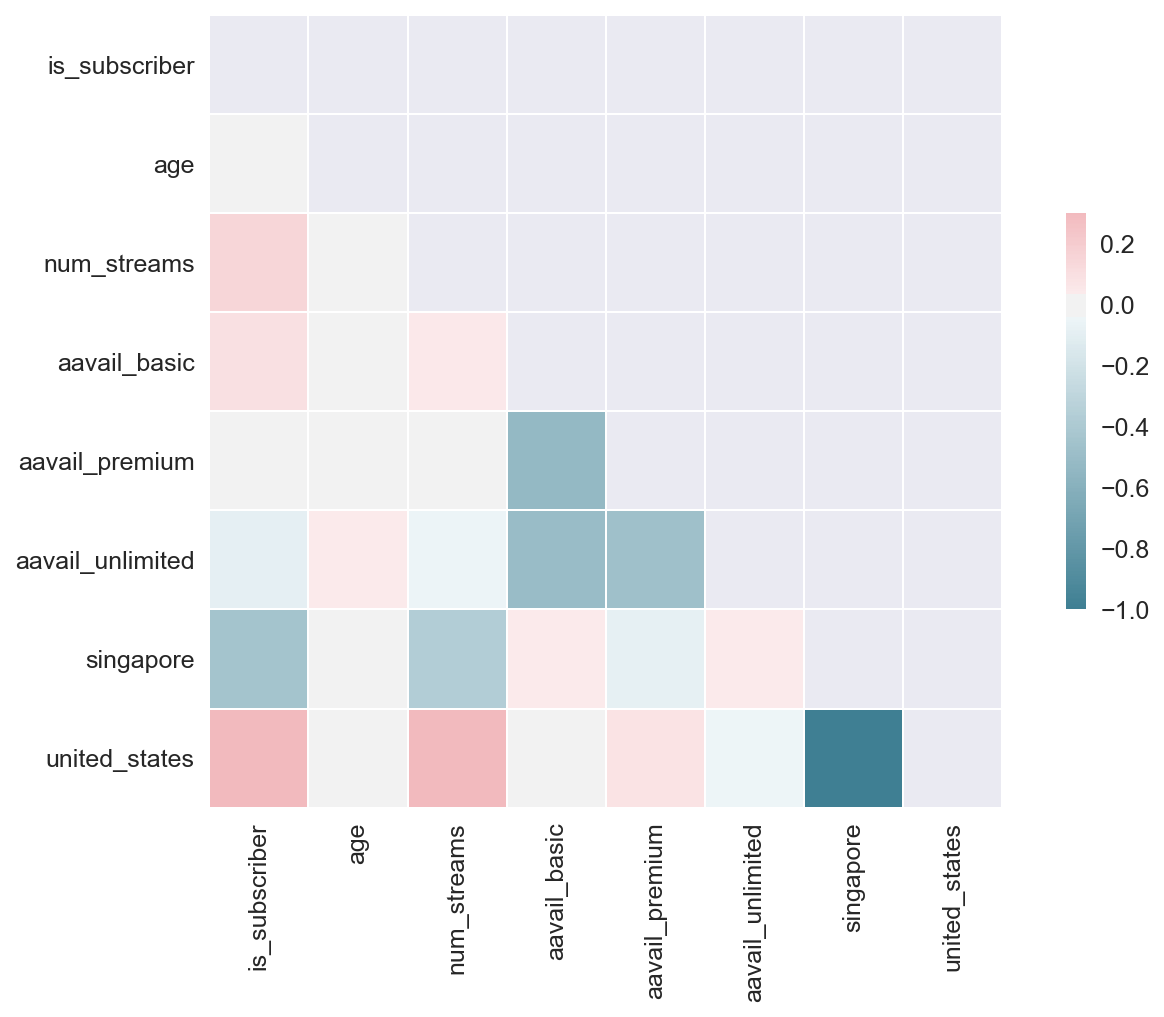

In [210]:
make_corr_plot(df1, labels)

In [212]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## variables
impute_col = 0
C = 0.1

# identify the values that can be used as features
y_impute = X[:, impute_col].copy()
X_impute = X[:, np.setdiff1d(np.arange(X.shape[1]), impute_col)].copy()
missing = np.isnan(y_impute)

# scale using sklearn 
scaler = preprocessing.StandardScaler().fit(X_impute)
X_impute = scaler.transform(X_impute)


mod1 = LogisticRegression(C = C)
mod1.fit(X_impute[~missing], y_impute[~missing])
print(X_impute[missing].shape)
predicted_missing = mod1.predict(X_impute[missing])
print(classification_report(known_missing, predicted_missing, target_names=['inactive', 'subscriber']))

X1 = X.copy()
X1[missing, impute_col] = predicted_missing

(50, 7)
              precision    recall  f1-score   support

    inactive       0.00      0.00      0.00        12
  subscriber       0.74      0.89      0.81        38

    accuracy                           0.68        50
   macro avg       0.37      0.45      0.40        50
weighted avg       0.56      0.68      0.62        50



In [19]:
import jupyterthemes
!jt -r

Reset css and font defaults in:
C:\Users\Alser\.jupyter\custom &
C:\Users\Alser\AppData\Roaming\jupyter\nbextensions


(883, 8)
[50  0  0  0  0  0  0  0]
